# ----------------------------------Heart Disease Prediction--------------------------------------

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier

from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Descriptive Statistics

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


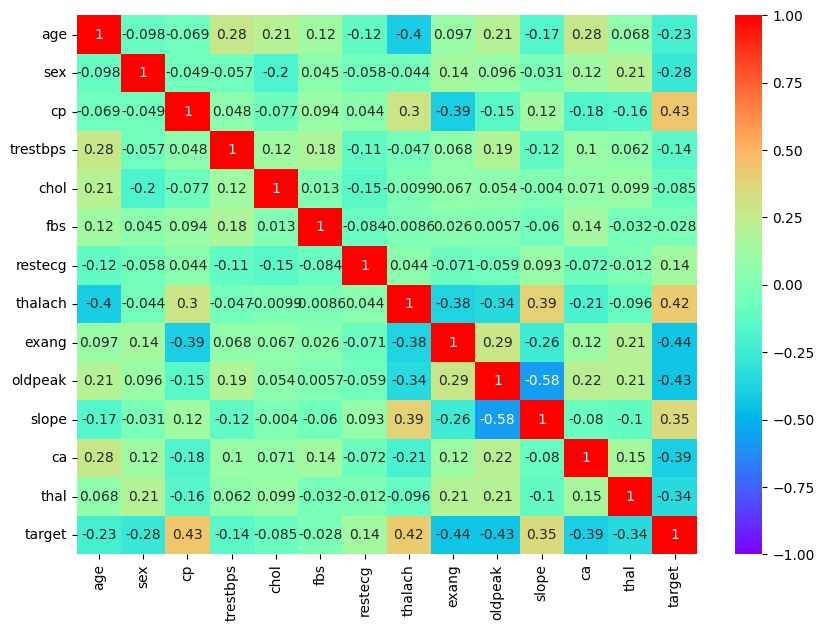

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow')
plt.show()

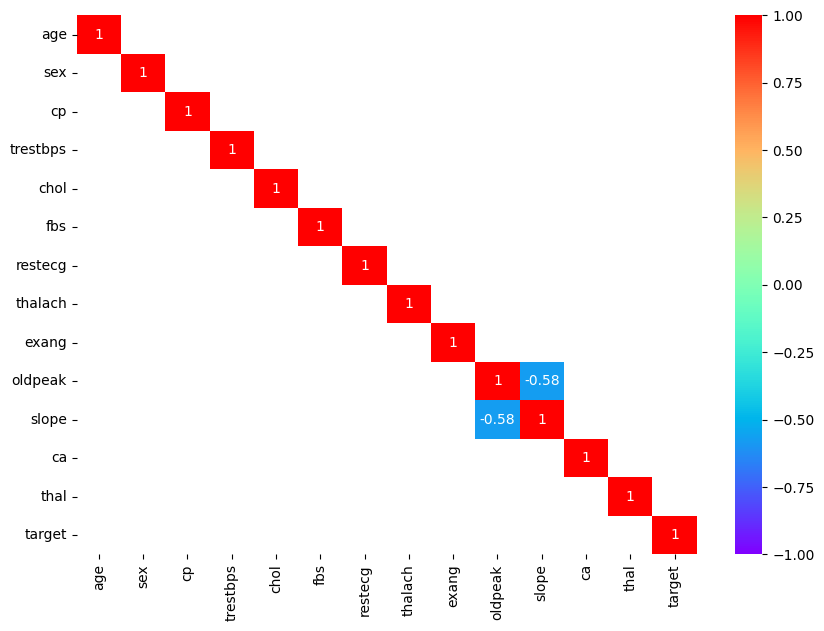

In [15]:
plt.figure(figsize=(10, 7))

# Filter correlations greater than 0.5 or less than -0.5
corr_filtered = data.corr()
corr_filtered = corr_filtered[(corr_filtered > 0.5) | (corr_filtered < -0.5)]

sns.heatmap(corr_filtered, annot=True, vmax=1, vmin=-1, cmap='rainbow')
plt.show()

## Univariate Analysis

In [26]:
# Numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach']

# Categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal']

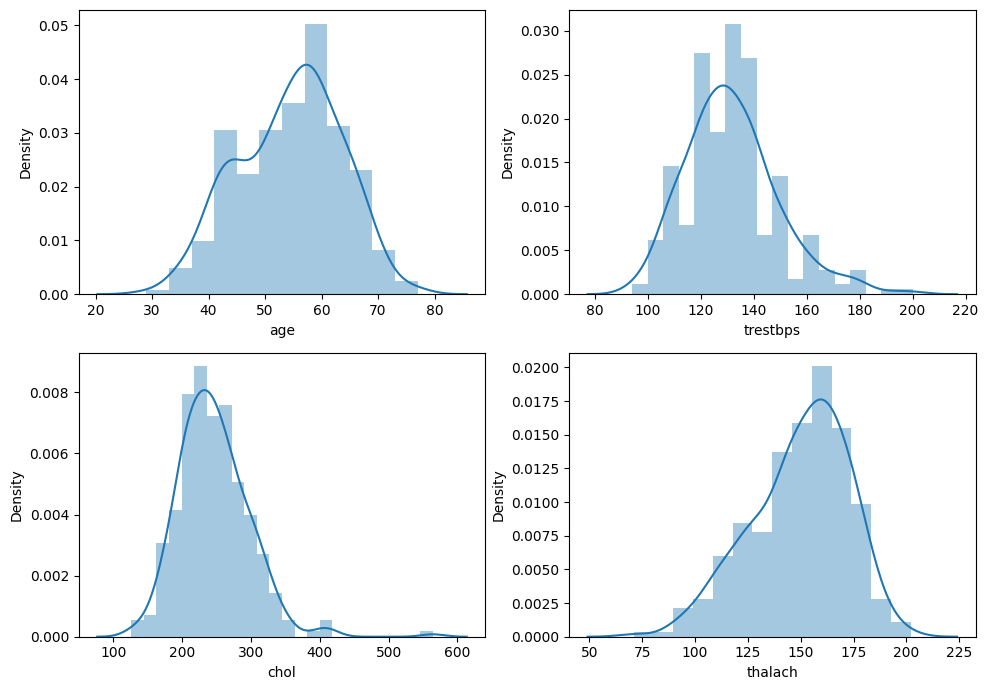

In [21]:
t =1
plt.figure(figsize=(10,7))
for i in numeric_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

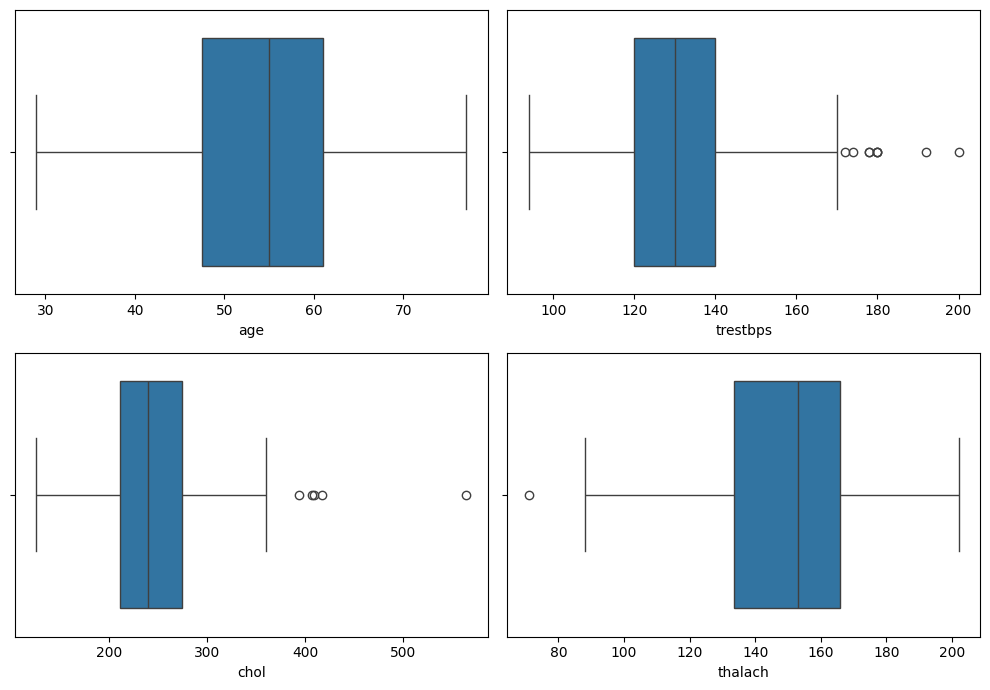

In [27]:
t =1
plt.figure(figsize=(10,7))
for i in numeric_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

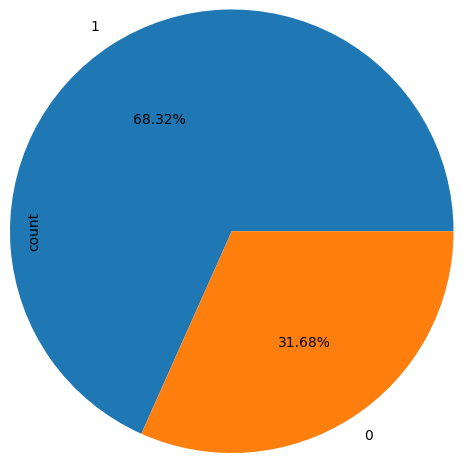

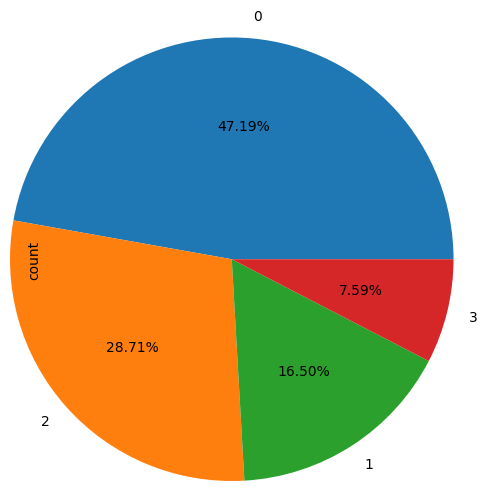

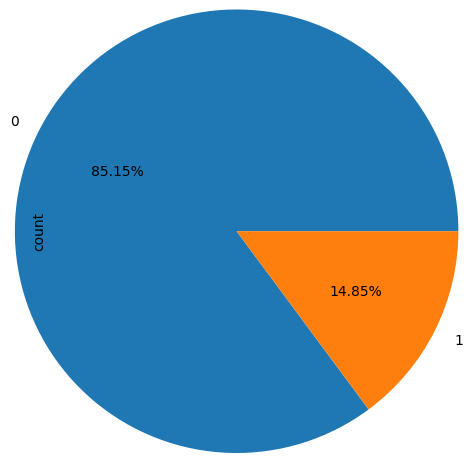

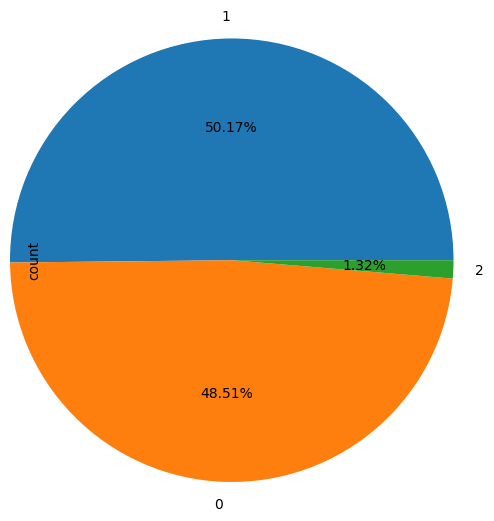

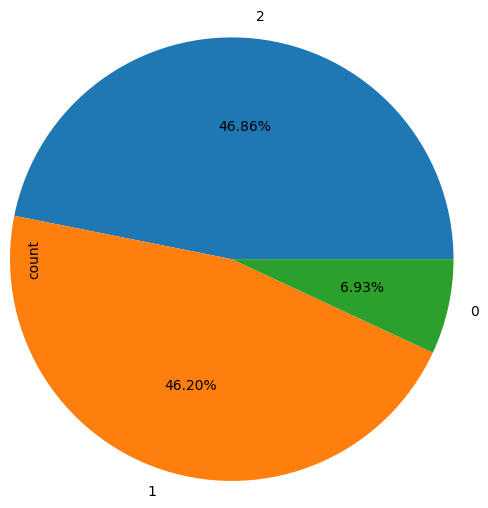

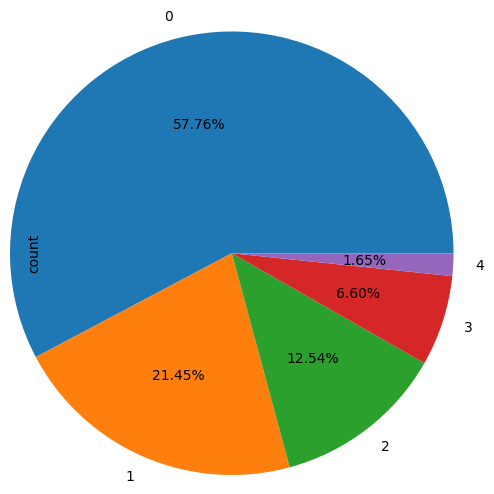

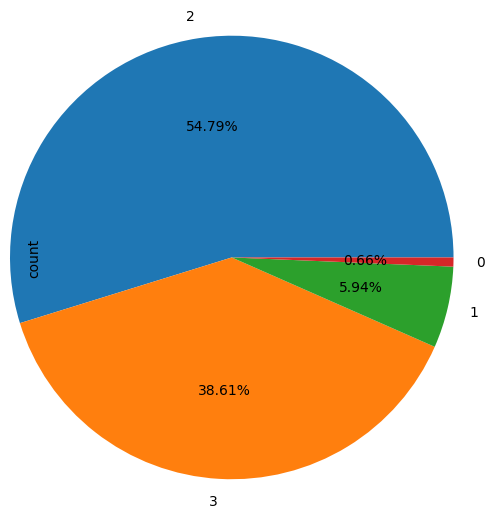

In [29]:
for i in categorical_cols:
    data[i].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.5)
    plt.show()

### Outlier Treatment

In [33]:
import numpy as np

def remove_outliers(df, num_cols):
   
    for col in num_cols:
        q1, q3 = np.quantile(df[col], [0.25, 0.75])
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        # Cap the outliers
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    
    return df

df = remove_outliers(data, numeric_cols)


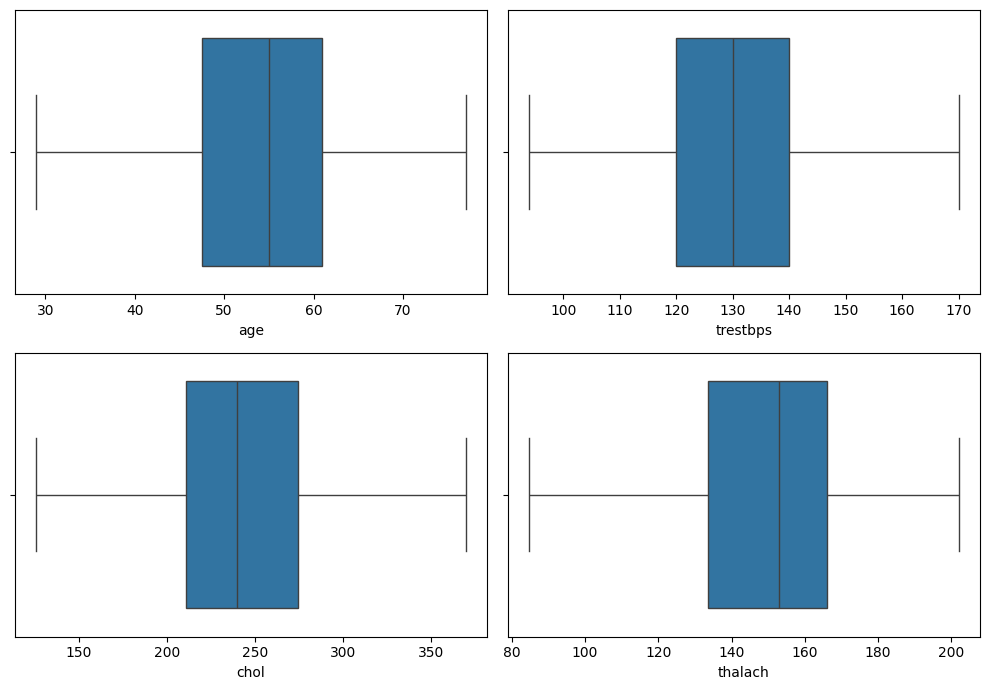

In [34]:
def plot_numeric_boxplots(df, numeric_cols):
   
    plt.figure(figsize=(10, 7))
    t = 1
    
    for col in numeric_cols:
        plt.subplot(2, 2, t)
        sns.boxplot(x=df[col], orient='h')
        plt.xlabel(col)  # Set the label of x-axis to the column name
        t += 1
    
    plt.tight_layout()
    plt.show()


plot_numeric_boxplots(df, numeric_cols)


### Encoding

In [58]:

def one_hot_encode(df, categorical_cols):
    
    encoded_df = pd.get_dummies(df, columns=categorical_cols,dtype=int)
    
    return encoded_df


encoded_data = one_hot_encode(df, categorical_cols)

In [59]:
encoded_data

,age,trestbps,chol,thalach,exang,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63.0,145.0,233.0,150.0,0,2.3,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37.0,130.0,250.0,187.0,0,3.5,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41.0,130.0,204.0,172.0,0,1.4,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56.0,120.0,236.0,178.0,0,0.8,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57.0,120.0,354.0,163.0,1,0.6,1,1,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,140.0,241.0,123.0,1,0.2,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
299,45.0,110.0,264.0,132.0,0,1.2,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68.0,144.0,193.0,141.0,0,3.4,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
301,57.0,130.0,131.0,115.0,1,1.2,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


### Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

def standard_scale(df, numeric_cols):


    scaler = StandardScaler()
    scaled_df = df.copy()
    scaled_df[numeric_cols] = scaler.fit_transform(scaled_df[numeric_cols])
    
    return scaled_df, scaler

scaled_data, scaler = standard_scale(encoded_data, columns_to_scale)

In [63]:
scaled_data

,age,trestbps,chol,thalach,exang,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.828728,-0.255601,0.013543,0,1.087338,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.077351,0.102487,1.641748,0,2.122573,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.077351,-0.866457,0.981665,0,0.310912,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.681403,-0.192409,1.245698,0,-0.206705,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.681403,2.293143,0.585615,1,-0.379244,1,1,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.526702,-0.087089,-1.174607,1,-0.724323,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.285455,0.397383,-0.778557,0,0.138373,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.768323,-1.098161,-0.382507,0,2.036303,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.077351,-2.404128,-1.526651,1,0.138373,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


## Predictive Modelling

In [64]:
y = scaled_data['target']
X = scaled_data.drop(['target'], axis = 1)

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [68]:
mod = []
accu = []
prec = []
rec = []
f1 = []
kappa = []


def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]
    
    print('Confusion Matrix\n',confusion_matrix(ytest,pred_h))
    print('Classification Report\n',classification_report(ytest,pred_h))
    
    fpr,tpr,thresh = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    response = input('Do you want to save a model Y/N?')
    
    if response.lower()=='y':
        global scorecard
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kappa.append(cohen_kappa_score(ytest,pred_h))

        scorecard = pd.DataFrame({'Model':mod,
                                 'Accuracy':accu,
                                 'Precision':prec,
                                 'Recall':rec,
                                 'F1 Score':f1,
                                 'Cohen Kappa':kappa})
    else:
        return

Confusion Matrix
 [[27  2]
 [ 4 28]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



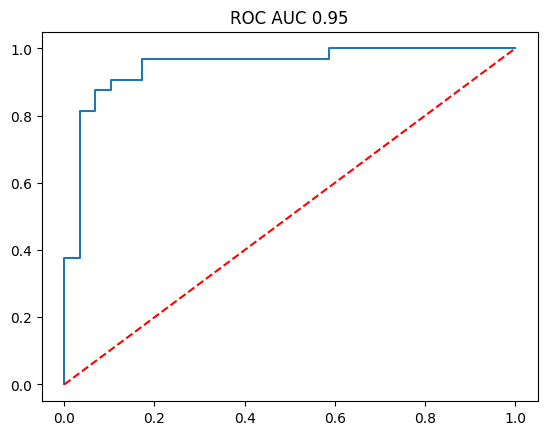

Do you want to save a model Y/N?Y


In [69]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

Confusion Matrix
 [[27  2]
 [29  3]]
Classification Report
               precision    recall  f1-score   support

           0       0.48      0.93      0.64        29
           1       0.60      0.09      0.16        32

    accuracy                           0.49        61
   macro avg       0.54      0.51      0.40        61
weighted avg       0.54      0.49      0.39        61



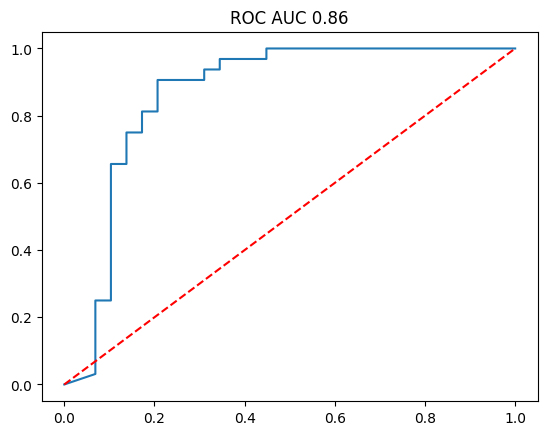

Do you want to save a model Y/N?N


In [70]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion Matrix
 [[24  5]
 [ 6 26]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



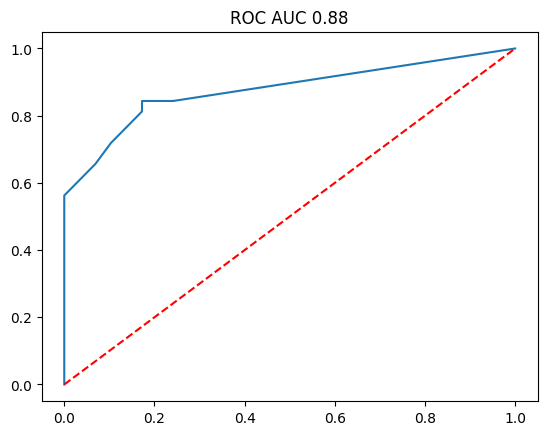

Do you want to save a model Y/N?Y


In [71]:
model_validation(DecisionTreeClassifier(max_depth=5),
                x_train,y_train,x_test,y_test)

Confusion Matrix
 [[25  4]
 [ 4 28]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



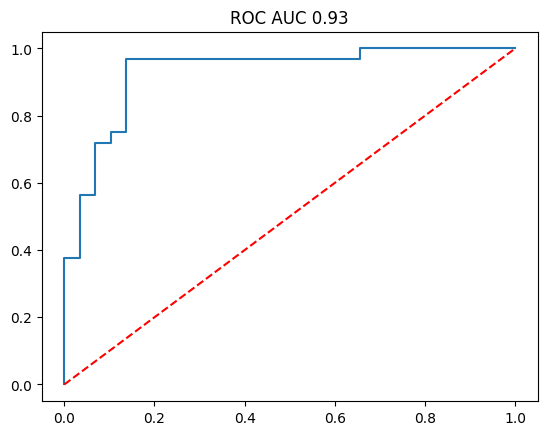

Do you want to save a model Y/N?Y


In [72]:
model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),
                x_train,y_train,x_test,y_test)

Confusion Matrix
 [[27  2]
 [ 7 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



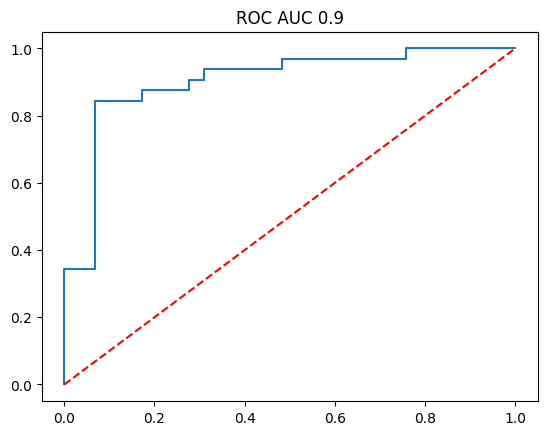

Do you want to save a model Y/N?Y


In [73]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),
                x_train,y_train,x_test,y_test)

Confusion Matrix
 [[26  3]
 [ 6 26]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



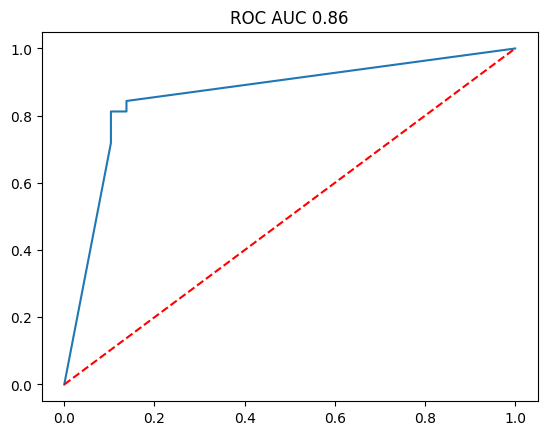

Do you want to save a model Y/N?Y


In [74]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=100),
                x_train,y_train,x_test,y_test)

Confusion Matrix
 [[25  4]
 [ 6 26]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



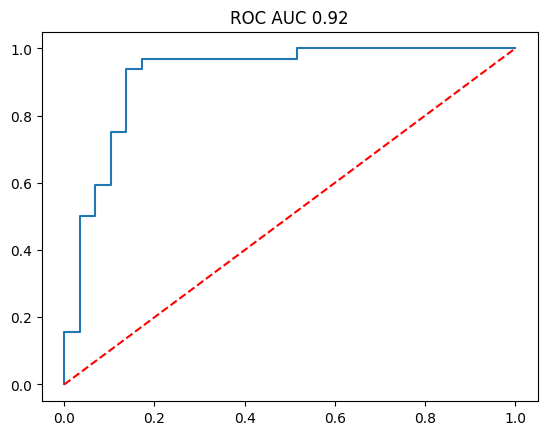

Do you want to save a model Y/N?y


In [75]:
model_validation(XGBClassifier(n_estimators=250,learning_rate=0.01,max_depth=7),
                 x_train,y_train,x_test,y_test)

In [77]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.901639,0.933333,0.87500,0.903226,0.803437
1,DecisionTreeClassifier(max_depth=5),0.819672,0.838710,0.81250,0.825397,0.639053
2,"RandomForestClassifier(max_depth=5, max_featur...",0.868852,0.875000,0.87500,0.875000,0.737069
3,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.852459,0.925926,0.78125,0.847458,0.706574
4,GradientBoostingClassifier(max_depth=7),0.852459,0.896552,0.81250,0.852459,0.705630
5,"XGBClassifier(base_score=None, booster=None, c...",0.836066,0.866667,0.81250,0.838710,0.672395
